In [3]:
import numpy as np
import pandas as pd
import pymc3 as pm
import arviz as az
import scipy as sp

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
az.style.use('arviz-darkgrid')

/Users/benjaminwee/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Hard

 ## 10H1

In [30]:
chimp = pd.read_csv('/Users/benjaminwee/Documents/courses/resources/Rethinking/Data/chimpanzees.csv',
                    sep = ';')

# Reset index to zero
chimp.actor = chimp.actor -1

In [38]:
# From chapter 10 pymc3 dev's notebook
# Note, had divergent chains. Had to give stronger priors (reduce sd to 1 from 10)
with pm.Model() as h1_1:
    a = pm.Normal('alpha', 0, 1, shape=len(chimp.actor.unique()))
    bp = pm.Normal('bp', 0, 1)
    bpC = pm.Normal('bpC', 0, 1)
    p = pm.math.invlogit(a[chimp.actor.values] + (bp + bpC * chimp.condition) * chimp.prosoc_left)
    pulled_left = pm.Binomial('pulled_left', 1, p, observed=chimp.pulled_left)

    trace_h1_1 = pm.sample(2000, tune=1000, cores = 4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [bpC, bp, alpha]
Sampling 4 chains: 100%|██████████| 12000/12000 [00:07<00:00, 1546.82draws/s]


In [34]:
pm.summary(trace_10_4)

/Users/benjaminwee/anaconda/lib/python3.6/site-packages/pymc3/stats.py:991: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  axis=1, join_axes=[dforg.index])


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alpha__0,-0.677539,0.256425,0.002528,-1.200386,-0.198807,11645.673484,1.000021
alpha__1,2.969281,0.534197,0.004621,1.913477,3.974344,14023.143302,0.999867
alpha__2,-0.963439,0.264571,0.002423,-1.473202,-0.445550,12452.381614,0.999851
alpha__3,-0.965197,0.264616,0.002644,-1.472502,-0.451810,10157.964083,0.999761
alpha__4,-0.674093,0.259145,0.002350,-1.173027,-0.165433,13827.015377,1.000061
alpha__5,0.219284,0.259702,0.002340,-0.284688,0.724825,12340.499521,0.999839
alpha__6,1.600776,0.339301,0.003081,0.966704,2.282241,12300.107777,0.999792
bp,0.773156,0.245001,0.002659,0.295453,1.253176,9091.637375,1.000020
bpC,-0.088949,0.279519,0.002175,-0.642086,0.458654,12154.910091,1.000024


In [35]:
with h1_1:
    map_8_1_map = pm.find_MAP()

/Users/benjaminwee/anaconda/lib/python3.6/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -275.03, ||grad|| = 0.0031127: 100%|██████████| 14/14 [00:00<00:00, 2003.97it/s]  


In [36]:
map_8_1_map

{'alpha': array([-0.66601596,  2.87885469, -0.94957349, -0.94957349, -0.66601596,
         0.21732275,  1.56510305]),
 'bp': array(0.7597463),
 'bpC': array(-0.08784741)}

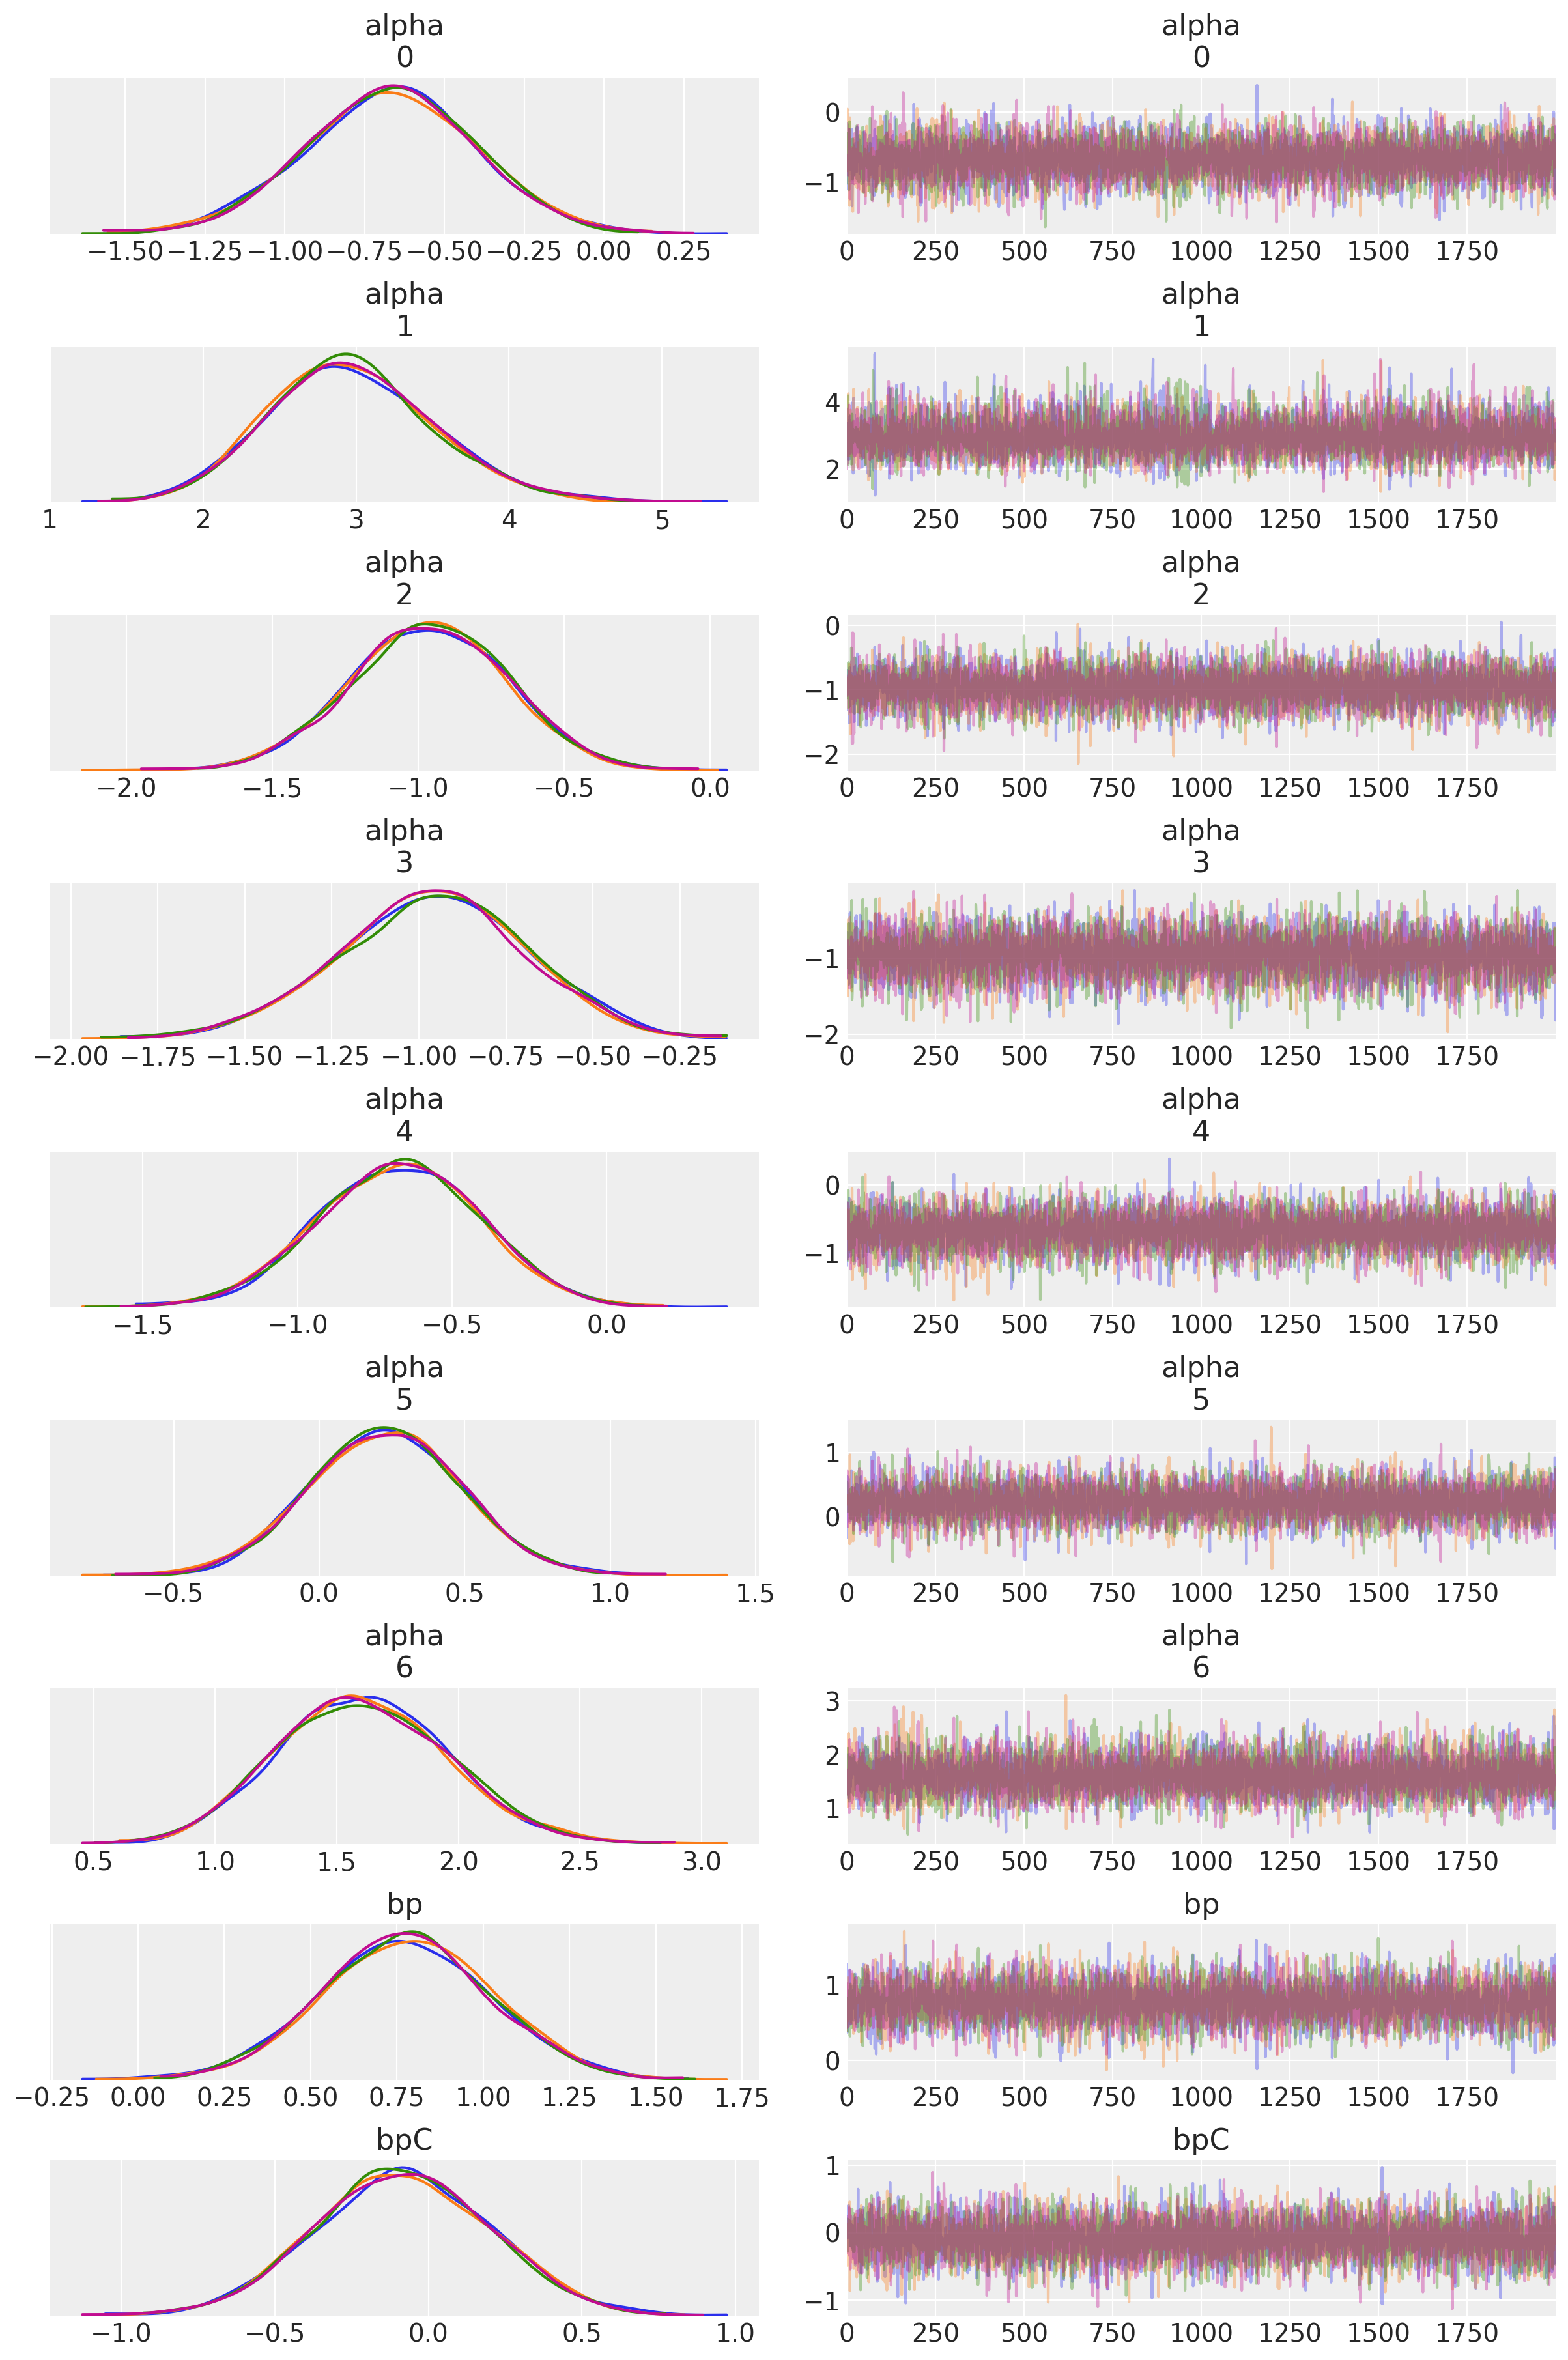

In [39]:
az.plot_trace(trace_h1_1);

## 10H2

In [40]:
# Intercept only
with pm.Model() as h2_1:
    a = pm.Normal('alpha', 0, 1)
    p = pm.math.invlogit(a)
    pulled_left = pm.Binomial('pulled_left', 1, p, observed=chimp.pulled_left)
    trace_h2_1 = pm.sample(2000, tune=1000, cores = 4)
    
# Intercept and prosocial left
with pm.Model() as h2_2:
    a = pm.Normal('alpha', 0, 1)
    bp = pm.Normal('bp', 0, 1)
    p = pm.math.invlogit(a + bp * chimp.prosoc_left)
    pulled_left = pm.Binomial('pulled_left', 1, p, observed=chimp.pulled_left)
    trace_h2_2 = pm.sample(2000, tune=1000, cores = 4)

# Add interaction with condition
with pm.Model() as h2_3:
    a = pm.Normal('alpha', 0, 1)
    bp = pm.Normal('bp', 0, 1)
    bpC = pm.Normal('bpC', 0, 1)
    p = pm.math.invlogit(a + (bp + bpC * chimp.condition) * chimp.prosoc_left)
    pulled_left = pm.Binomial('pulled_left', 1, p, observed=chimp.pulled_left)
    trace_h2_3 = pm.sample(2000, tune=1000, cores = 4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha]
Sampling 4 chains: 100%|██████████| 12000/12000 [00:03<00:00, 3505.84draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [bp, alpha]
Sampling 4 chains: 100%|██████████| 12000/12000 [00:05<00:00, 2320.53draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [bpC, bp, alpha]
Sampling 4 chains: 100%|██████████| 12000/12000 [00:06<00:00, 1791.57draws/s]


In [56]:
compare_h2 = pm.compare({h1_1 : trace_h1_1,
                         h2_1 : trace_h2_1,
                         h2_2 : trace_h2_2,
                         h2_3 : trace_h2_3})

/Users/benjaminwee/anaconda/lib/python3.6/site-packages/pymc3/stats.py:558: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  ics.append((n, ic_func(t, m, pointwise=True)))


In [57]:
compare_h2

,WAIC,pWAIC,dWAIC,weight,SE,dSE,var_warn
0,534.81,7.57,0,1,18.33,0,0
2,680.45,1.97,145.64,0,9.17,17.52,0
3,682.15,2.9,147.35,0,9.29,17.5,0
1,687.91,0.99,153.1,0,7.12,18.27,0


Model h1_1 (in question 10H1) with fixed effects performs best according to WAIC. Within group variation stronger than just treatment effect alone within the sample and is expected to perform better out of sample.

## 10H3

In [121]:
eagles = pd.read_csv('/Users/benjaminwee/Documents/courses/resources/Rethinking/Data/eagles.csv',
                    sep = ';')

In [122]:
# Create dummy variables
dummy_vars = pd.get_dummies(eagles[['P', 'A', 'V']]).iloc[:, ::2]
dummy_vars.columns = ["P", "A", "V"]

# Create dataset
df = eagles.iloc[:, 0:2].join(dummy_vars)

In [172]:
with pm.Model() as h3_1:
    a = pm.Normal('a', 0, 10)
    bp = pm.Normal('bp', 0, 5)
    ba = pm.Normal('ba', 0, 5)
    bv = pm.Normal('bv', 0, 5)
    
    p = pm.math.invlogit(a + bp * df.P + ba * df.A + bv * df.V)
    prob = pm.Deterministic('p', p)
    y = pm.Binomial('pirate', df.n, p, observed = df.y)
    
    trace_h3_1 = pm.sample(2000, tune=2000, cores = 2)
    
pm.summary(trace_h3_1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [bv, ba, bp, a]
Sampling 2 chains: 100%|██████████| 8000/8000 [00:08<00:00, 973.31draws/s] 
/Users/benjaminwee/anaconda/lib/python3.6/site-packages/pymc3/stats.py:991: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  axis=1, join_axes=[dforg.index])


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
a,0.663648,0.709720,0.015235,-0.744829,2.070929,1974.551425,1.002103
bp,4.640729,0.975202,0.023247,2.958840,6.673958,1631.153898,1.000023
ba,1.111468,0.551315,0.011872,0.050529,2.226429,2064.701817,1.001085
bv,-5.047866,1.035681,0.026192,-7.063117,-3.069011,1432.561751,0.999814
p__0,0.787153,0.074206,0.001494,0.642985,0.926391,2627.472076,1.000052
p__1,0.997282,0.002987,0.000073,0.991734,0.999989,1751.936560,1.000040
p__2,0.561821,0.087259,0.001569,0.389027,0.729745,3075.674592,1.000522
p__3,0.991838,0.008886,0.000210,0.975196,0.999981,1786.964666,1.000075
p__4,0.051309,0.041375,0.000895,0.000773,0.136874,2202.133373,0.999789
p__5,0.839978,0.075350,0.001340,0.694062,0.970838,2986.382234,1.000229


In [173]:
az.summary(trace_h3_1, var_names='~p')

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
a,0.664,0.710,-0.620,2.066,0.016,0.011,1996.0,1971.0,2000.0,2171.0,1.0
bp,4.641,0.975,2.959,6.521,0.024,0.018,1650.0,1550.0,1749.0,1880.0,1.0
ba,1.111,0.551,0.051,2.128,0.012,0.009,2083.0,2070.0,2074.0,2139.0,1.0
bv,-5.048,1.036,-6.959,-3.131,0.027,0.020,1441.0,1375.0,1499.0,1815.0,1.0


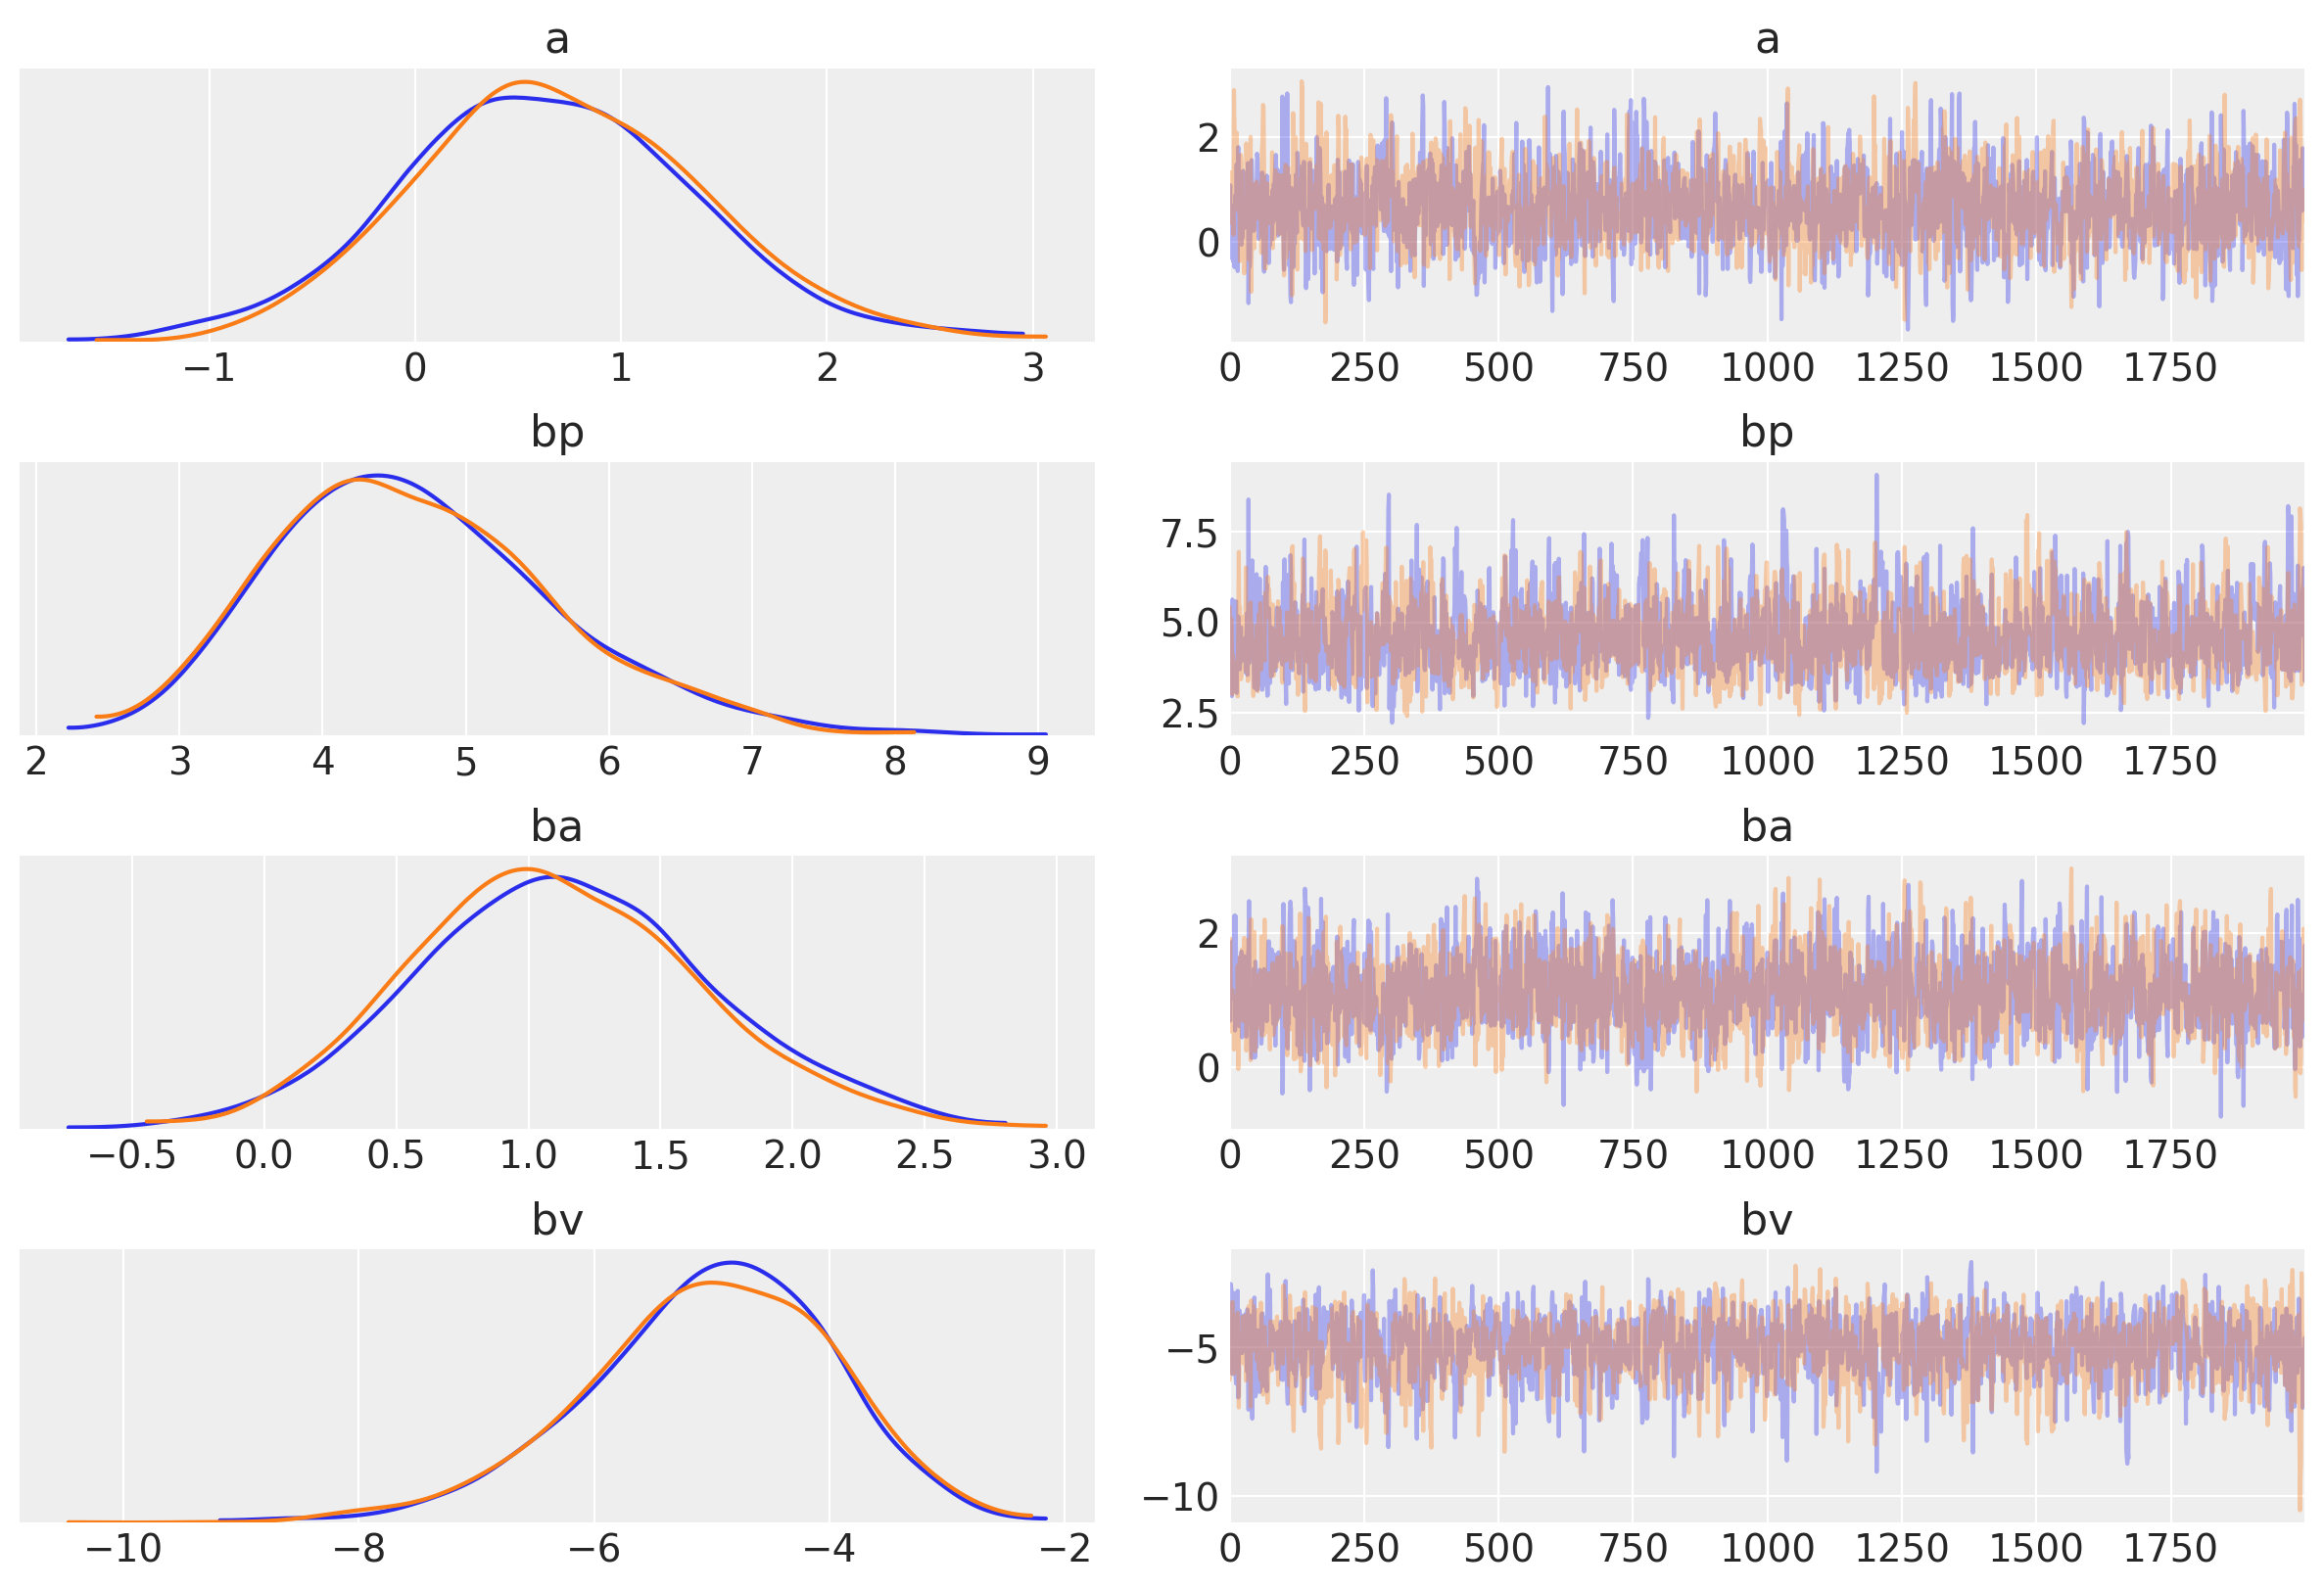

In [174]:
az.plot_trace(trace_h3_1, var_names='~p');

In [175]:
with h3_1:
    map_h3_1 = pm.find_MAP()

/Users/benjaminwee/anaconda/lib/python3.6/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -21.517, ||grad|| = 0.025703: 100%|██████████| 17/17 [00:00<00:00, 1997.68it/s]  


In [176]:
map_h3_1

{'a': array(0.59154318),
 'ba': array(1.08141052),
 'bp': array(4.24182384),
 'bv': array(-4.59260843),
 'p': array([0.78954236, 0.99730801, 0.55990058, 0.99210318, 0.05119047,
        0.84196923, 0.0179674 , 0.64371914])}

### 10H3b

Predicted probability of success

In [241]:
trace_frame = pm.trace_to_dataframe(trace_h3_1).filter(regex=('p_.*'))

In [254]:
for i in trace_frame.columns:
    print(pm.hpd(trace_frame.loc[:,i]))

[0.64298523 0.92639121]
[0.99173439 0.99998906]
[0.38902701 0.72974533]
[0.97519614 0.99998051]
[0.00077341 0.13687408]
[0.69406208 0.97083778]
[0.00020627 0.05190326]
[0.35879619 0.9090448 ]


Text(0,0.5,'Parameter p')

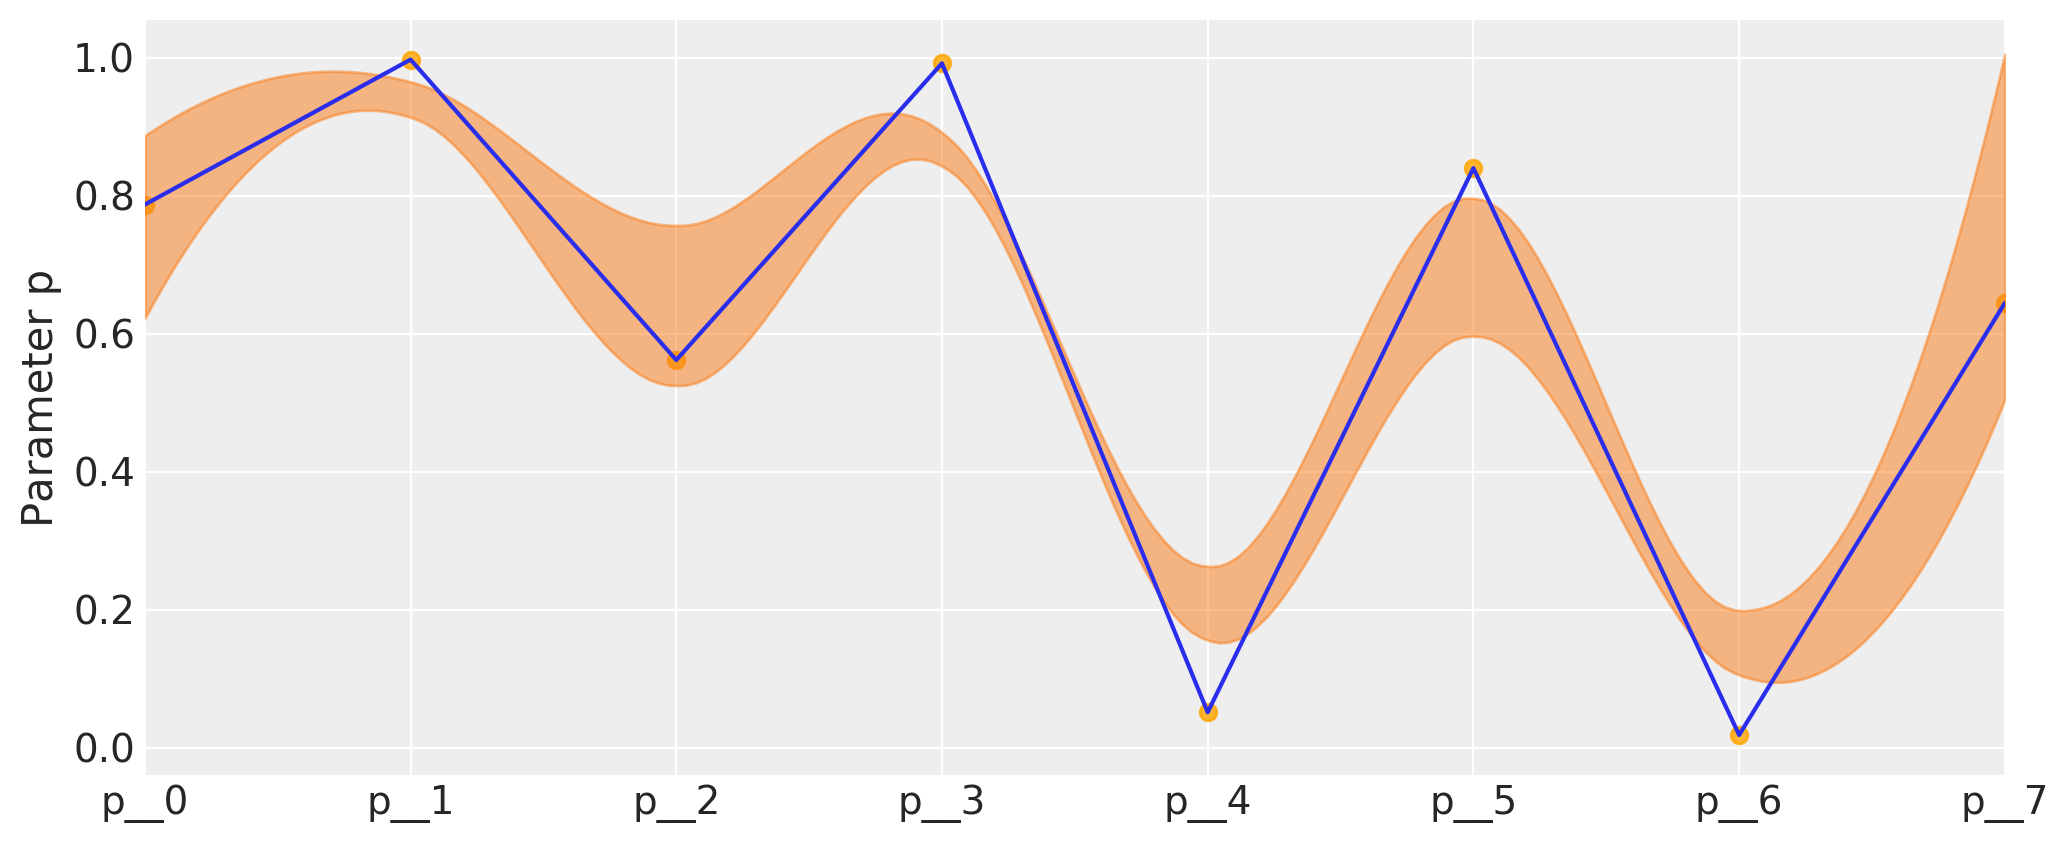

In [235]:
# Don't know why hpd refuses to display properly
import matplotlib.pyplot as plt
prob = trace_frame.mean(0)

plt.figure(figsize=(12,5))
plt.scatter(df.index, prob, color='orange', alpha=0.8)
prob.plot()
az.plot_hpd(df.index, trace_frame, credible_interval=0.89);
plt.ylabel("Parameter p")

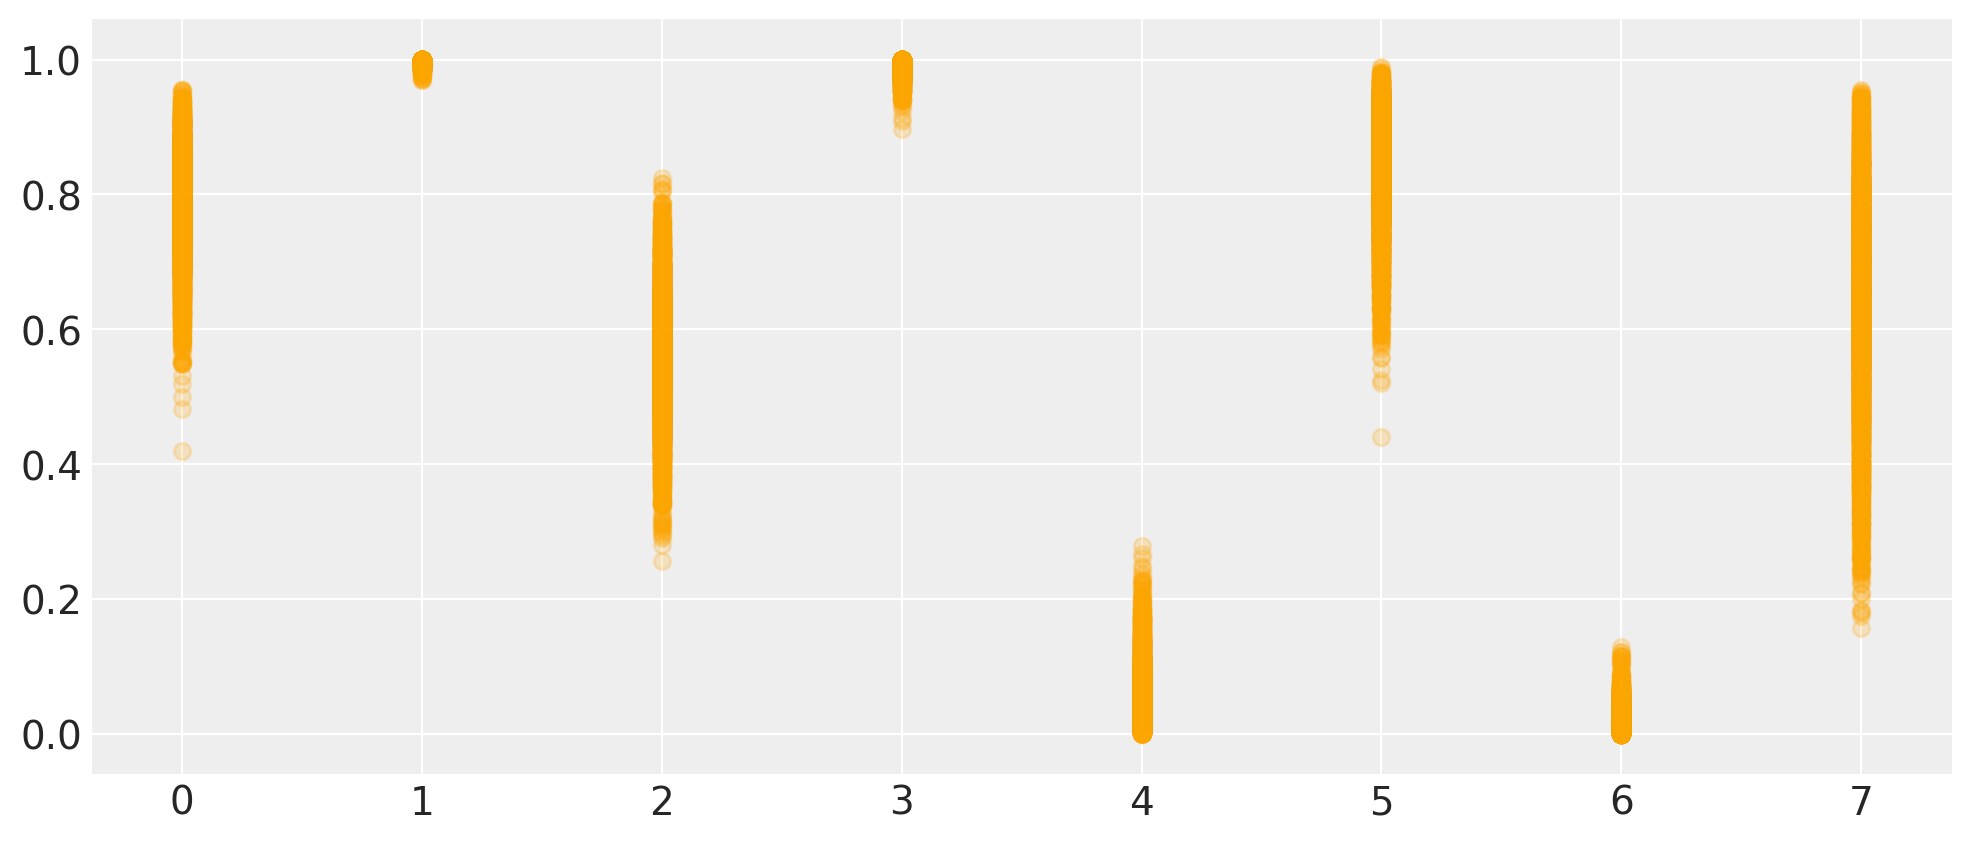

In [266]:
# Distribution of p at each outcome
plt.figure(figsize=(12,5))

for i in range(len(trace_frame)):
    plt.scatter(df.index, trace_frame.T[i], color='orange', alpha=0.2)


Predicted counts

In [311]:
post_pred_check = pm.sample_posterior_predictive(trace_h3_1, model=h3_1)['pirate']
post_pred_check_df = pd.DataFrame(data=post_pred_check, columns=df.index)
post_pred_check_df.head()

100%|██████████| 4000/4000 [00:03<00:00, 1259.35it/s]


,0,1,2,3,4,5,6,7
0,16,29,16,20,1,13,0,2
1,18,29,15,20,1,14,0,2
2,23,28,18,18,1,11,0,2
3,18,29,18,19,1,12,0,2
4,16,29,10,18,1,13,2,1


Text(0.5,1,'Posterior predicted counts\nGreen - Observed outcome, blue - predicted outcome')

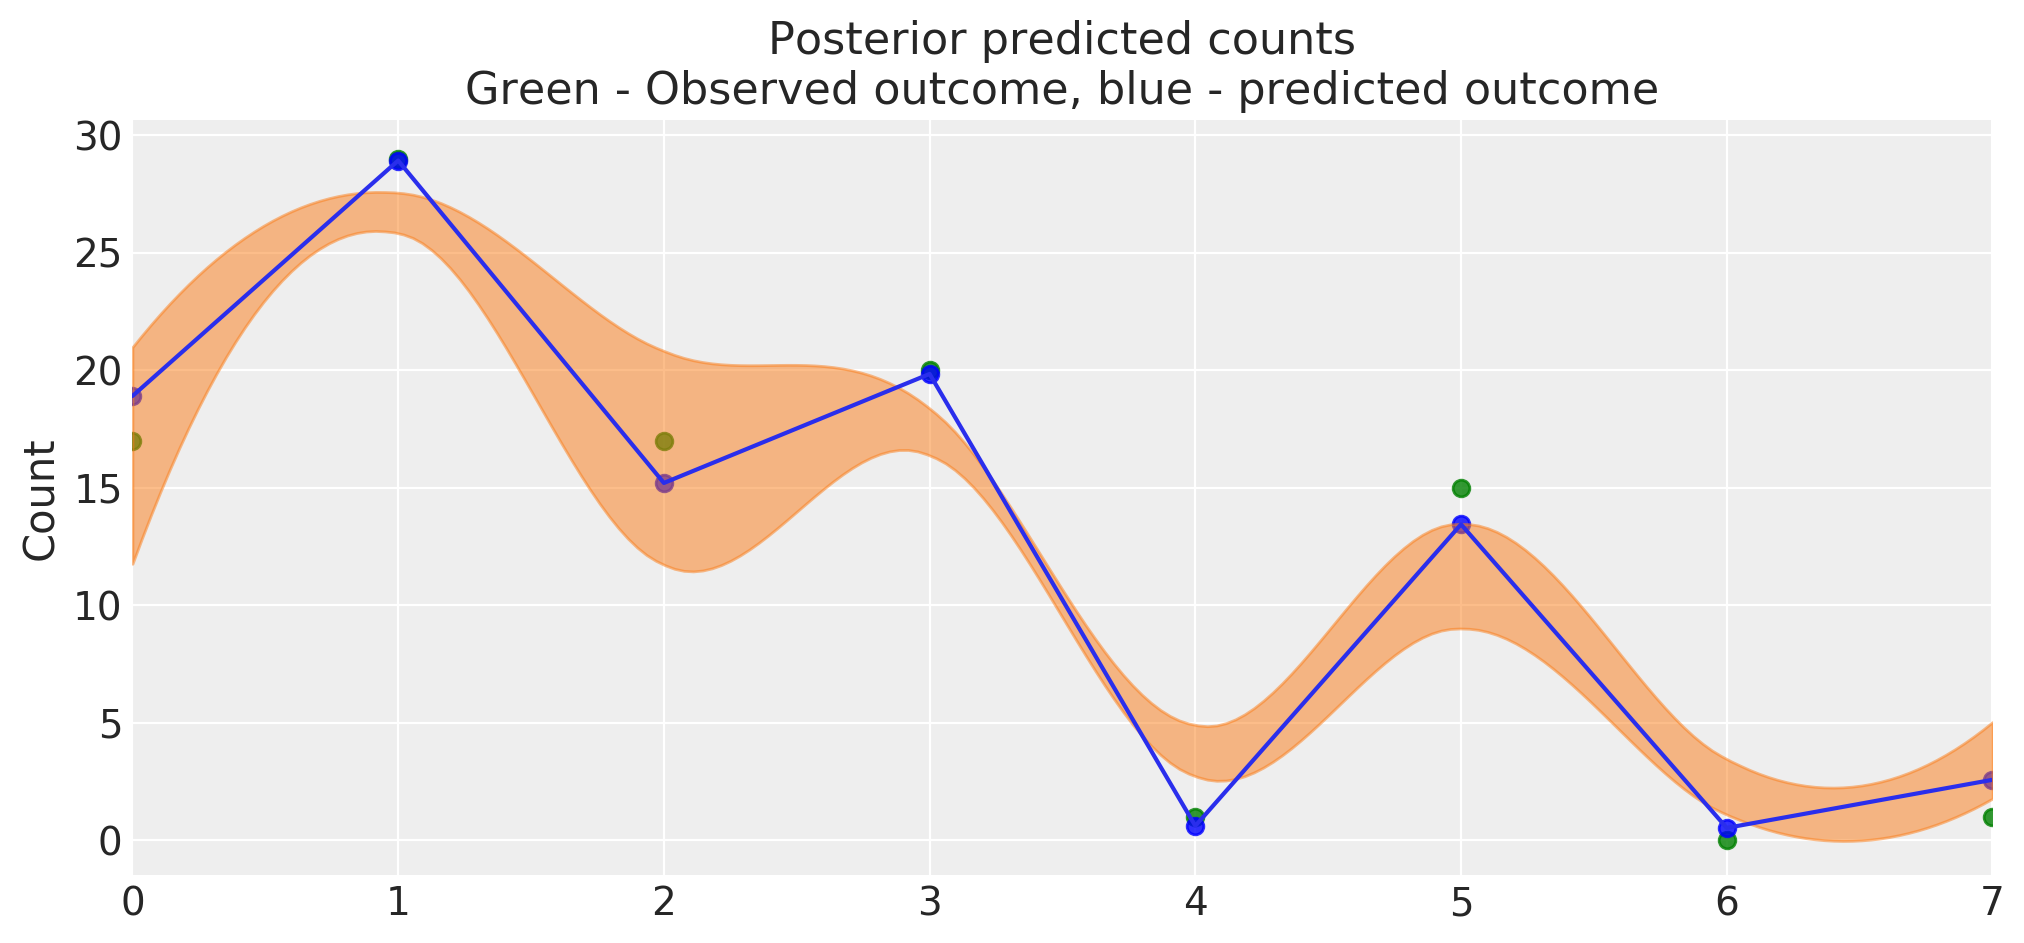

In [265]:
# Not sure why HPD interval misses everything
import matplotlib.pyplot as plt
expected_count = post_pred_check_df.mean(0)

plt.figure(figsize=(12,5))
plt.scatter(df.index, df.y, color='green', alpha=0.8)
plt.scatter(df.index, expected_count, color='blue', alpha=0.8)
expected_count.plot()
az.plot_hpd(df.index, post_pred_check_df, credible_interval=0.89);
plt.ylabel("Count")
plt.title("Posterior predicted counts\nGreen - Observed outcome, blue - predicted outcome", y = 1)


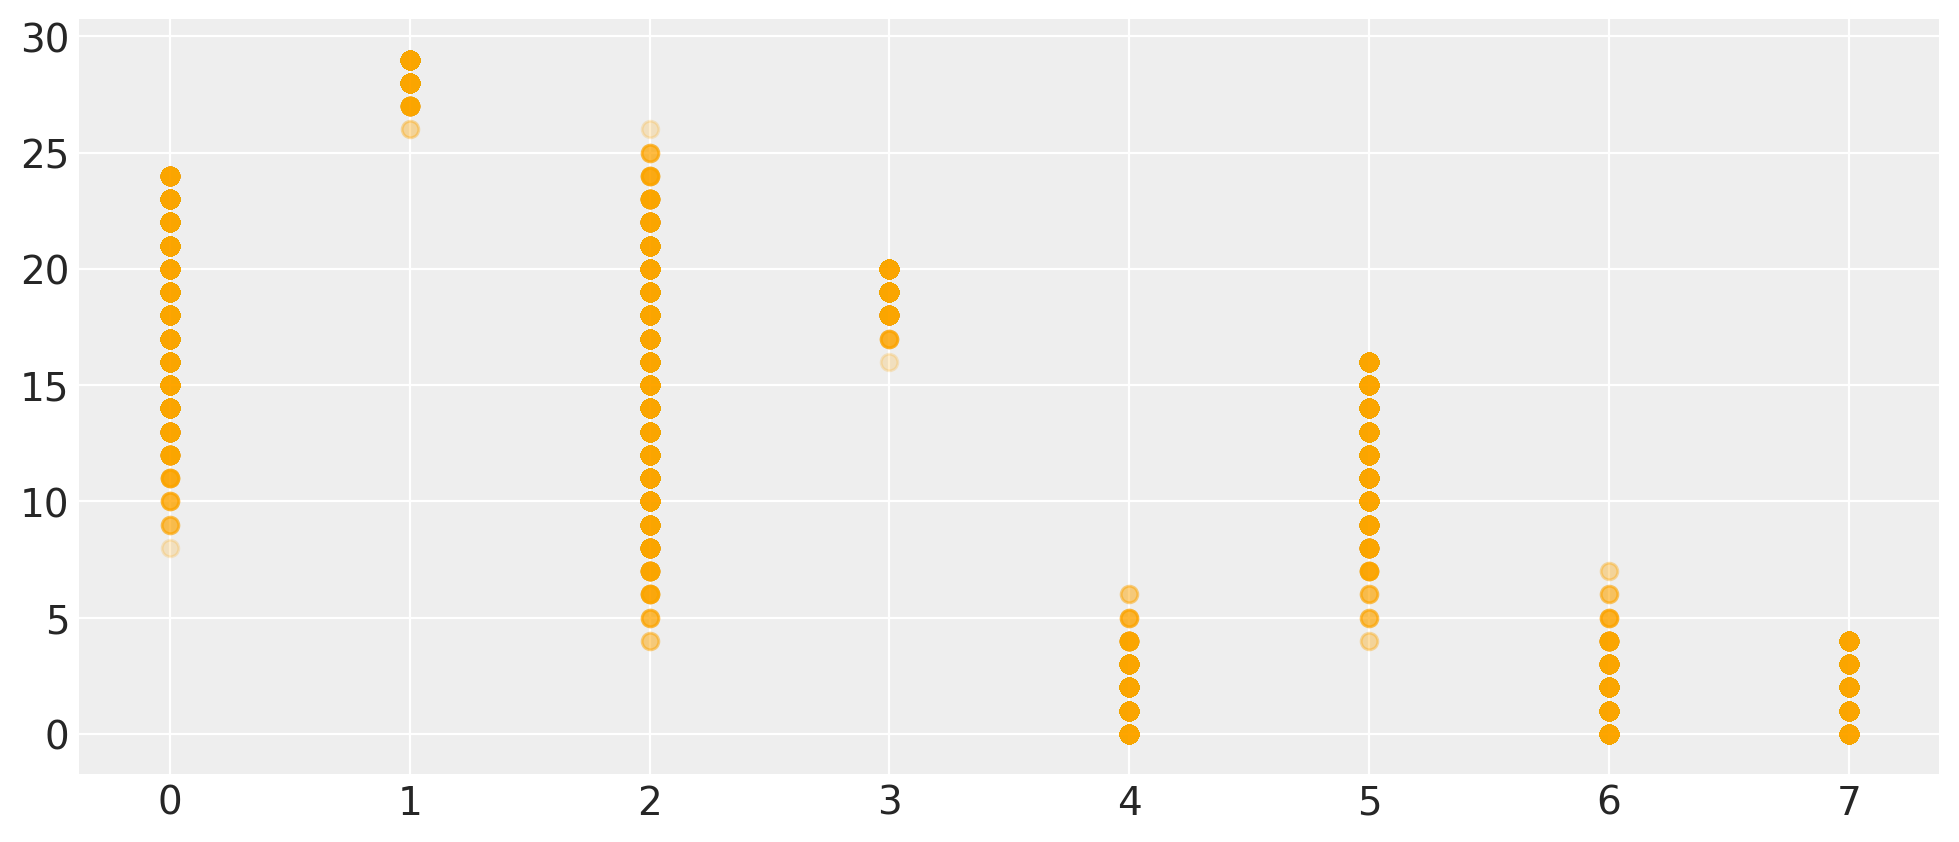

In [267]:
# Posterior predictive distribution (better than HPD)
plt.figure(figsize=(12,5))

for i in range(len(post_pred_check_df)):
    plt.scatter(df.index, post_pred_check_df.T[i], color='orange', alpha=0.2)


### 10H3C

In [270]:
df['PA'] = df.P * df.A
df.head()

,y,n,P,A,V,PA
0,17,24,1,1,1,1
1,29,29,1,1,0,1
2,17,27,1,0,1,0
3,20,20,1,0,0,0
4,1,12,0,1,1,0


In [277]:
with pm.Model() as h3_2:
    a = pm.Normal('a', 0, 10)
    bp = pm.Normal('bp', 0, 5)
    ba = pm.Normal('ba', 0, 5)
    bv = pm.Normal('bv', 0, 5)
    bpa = pm.Normal('bpa', 0, 5)
    
    p = pm.math.invlogit(a + bp * df.P + ba * df.A + bv * df.V + bpa * df.PA)
    prob = pm.Deterministic('p', p)
    y = pm.Binomial('pirate', df.n, p, observed = df.y)
    
    trace_h3_2 = pm.sample(2000, tune=2000, cores = 2)
    
pm.summary(trace_h3_2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [bpa, bv, ba, bp, a]
Sampling 2 chains: 100%|██████████| 8000/8000 [00:11<00:00, 719.53draws/s]
/Users/benjaminwee/anaconda/lib/python3.6/site-packages/pymc3/stats.py:991: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  axis=1, join_axes=[dforg.index])


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
a,-0.825454,1.054773,0.028805,-2.958448,1.160326,1491.628015,0.999885
bp,6.590164,1.420279,0.040728,3.985814,9.538401,1157.915911,1.000401
ba,3.468512,1.240571,0.036034,0.869038,5.808852,1252.663583,0.999993
bv,-5.248860,1.165183,0.028548,-7.530687,-3.042502,1351.631987,1.000126
bpa,-3.010458,1.356311,0.037868,-5.865727,-0.513995,1308.457389,1.000211
p__0,0.716741,0.090292,0.001337,0.551122,0.895902,4171.701046,0.999950
p__1,0.996227,0.004765,0.000097,0.987233,0.999986,2112.226066,1.000171
p__2,0.621666,0.090730,0.001263,0.442267,0.799438,4781.003458,0.999767
p__3,0.994217,0.007090,0.000151,0.980747,0.999971,1852.635346,1.000311
p__4,0.093242,0.071063,0.001238,0.001897,0.231471,2778.080196,0.999894


In [278]:
pm.compare({h3_1 : trace_h3_1,
            h3_2 : trace_h3_2})


/Users/benjaminwee/anaconda/lib/python3.6/site-packages/pymc3/stats.py:558: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  ics.append((n, ic_func(t, m, pointwise=True)))
/Users/benjaminwee/anaconda/lib/python3.6/site-packages/pymc3/stats.py:219: UserWarning: For one or more samples the posterior variance of the
        log predictive densities exceeds 0.4. This could be indication of
        WAIC starting to fail see http://arxiv.org/abs/1507.04544 for details
        
  """)
/Users/benjaminwee/anaconda/lib/python3.6/site-packages/pymc3/stats.py:558: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  ics.append((n, ic_func(t, m, pointwise=True)))
/Users/benj

,WAIC,pWAIC,dWAIC,weight,SE,dSE,var_warn
1,20.78,2.09,0,1,5.62,0,1
0,30.4,5.05,9.62,0,7.72,3.31,1


Model with the interaction term has lowest WAIC with all akaike weight. Negative coefficient on interactive effect, suggesting when you're an adult, size matters less _relative_ to size when you're not an adult. And vice versa. Being an adult matters less when you're already big relative to being a younger pirate and large (relatively speaking).

## 10H4

In [285]:
sal = pd.read_csv('/Users/benjaminwee/Documents/courses/resources/Rethinking/Data/salamanders.csv',
                 sep = ';')

sal.head()

,SITE,SALAMAN,PCTCOVER,FORESTAGE
0,1,13,85,316
1,2,11,86,88
2,3,11,90,548
3,4,9,88,64
4,5,8,89,43


In [288]:
def z_score(x):
    z = (x - x.mean())/x.std()
    return z

sal['PCTCOVER_z'] = z_score(sal['PCTCOVER'])
sal['FORESTAGE_z'] = z_score(sal['FORESTAGE'])

In [467]:
with pm.Model() as h4_1:
    a = pm.Normal('a', 0, 1)
    bp = pm.Normal('bp', 0, 1)
    
    lam = pm.math.exp(a + bp * sal.PCTCOVER_z)
    lamb = pm.Deterministic('lamb', lam)
    obs = pm.Poisson('SALAMAN', lam, observed=sal.SALAMAN)
    trace_h4_1 = pm.sample(2000, tune=2000, cores = 2)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [bp, a]
Sampling 2 chains: 100%|██████████| 8000/8000 [00:03<00:00, 2496.65draws/s]
The number of effective samples is smaller than 25% for some parameters.


In [468]:
az.summary(trace_h4_1, ['~lamb'])

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
a,0.420,0.155,0.128,0.714,0.005,0.004,964.0,964.0,976.0,1538.0,1.0
bp,1.156,0.187,0.811,1.511,0.006,0.004,940.0,937.0,947.0,1857.0,1.0


bf is positive, suggesting an increase in cover increases density. But need to see this on outcome scale.


### Plot mean and posterior predictions

In [469]:
trace_h4 = pm.trace_to_dataframe(trace_h4_1).filter(regex=('lamb*'))
post_pred_c = pm.sample_posterior_predictive(trace_h4_1, model=h4_1)['SALAMAN']
post_pred_c_df = pd.DataFrame(data=post_pred_c, columns=sal.PCTCOVER)
post_pred_c_df.head()

100%|██████████| 4000/4000 [00:02<00:00, 1594.95it/s]


PCTCOVER,85,86,90,88,89,83,83,91,88,90,87,83,87,89,92,93,2,87,93,7,16,19,29,34,46,80,86,88,92,0,1,3,5,8,9,11,14,17,24,44,52,77,78,80,86,89,91
0,3,4,2,2,4,5,2,4,2,3,7,4,4,4,2,3,0,1,1,0,0,1,0,0,1,5,3,2,2,0,0,0,0,0,0,0,2,0,2,0,1,2,1,2,6,1,4
1,6,6,6,6,2,3,4,5,3,2,4,4,5,2,2,5,0,3,6,0,1,1,1,1,2,2,3,3,3,0,0,0,0,1,0,0,0,1,0,2,2,0,5,2,4,4,2
2,6,4,2,2,5,1,2,4,6,3,4,5,2,6,5,8,0,9,1,0,0,0,0,1,0,6,4,6,4,0,1,0,0,0,0,0,0,0,0,2,3,3,3,5,3,5,7
3,5,3,2,4,2,2,5,4,2,3,3,3,3,4,4,6,0,2,3,0,0,0,1,0,0,5,4,5,10,0,0,2,0,0,0,0,0,0,0,1,1,3,3,5,6,7,1
4,2,4,5,4,6,1,3,3,4,4,4,1,3,2,2,7,0,2,5,0,0,0,2,1,2,3,5,3,4,1,0,0,0,1,0,0,0,0,0,0,2,0,4,1,5,3,8


In [470]:
# Sort and resset the index to plot renders correctly
lambda_df = pd.concat([sal.PCTCOVER, pd.DataFrame(expected_value).reset_index().iloc[:, -1]], axis=1)\
              .rename(columns={0: "lamb"})\
              .sort_values(by=['PCTCOVER'])\
              .reset_index()

lambda_df.head()


,index,PCTCOVER,lamb
0,29,0,0.248812
1,30,1,0.256410
2,16,2,0.264246
3,31,3,0.272330
4,32,5,0.289270


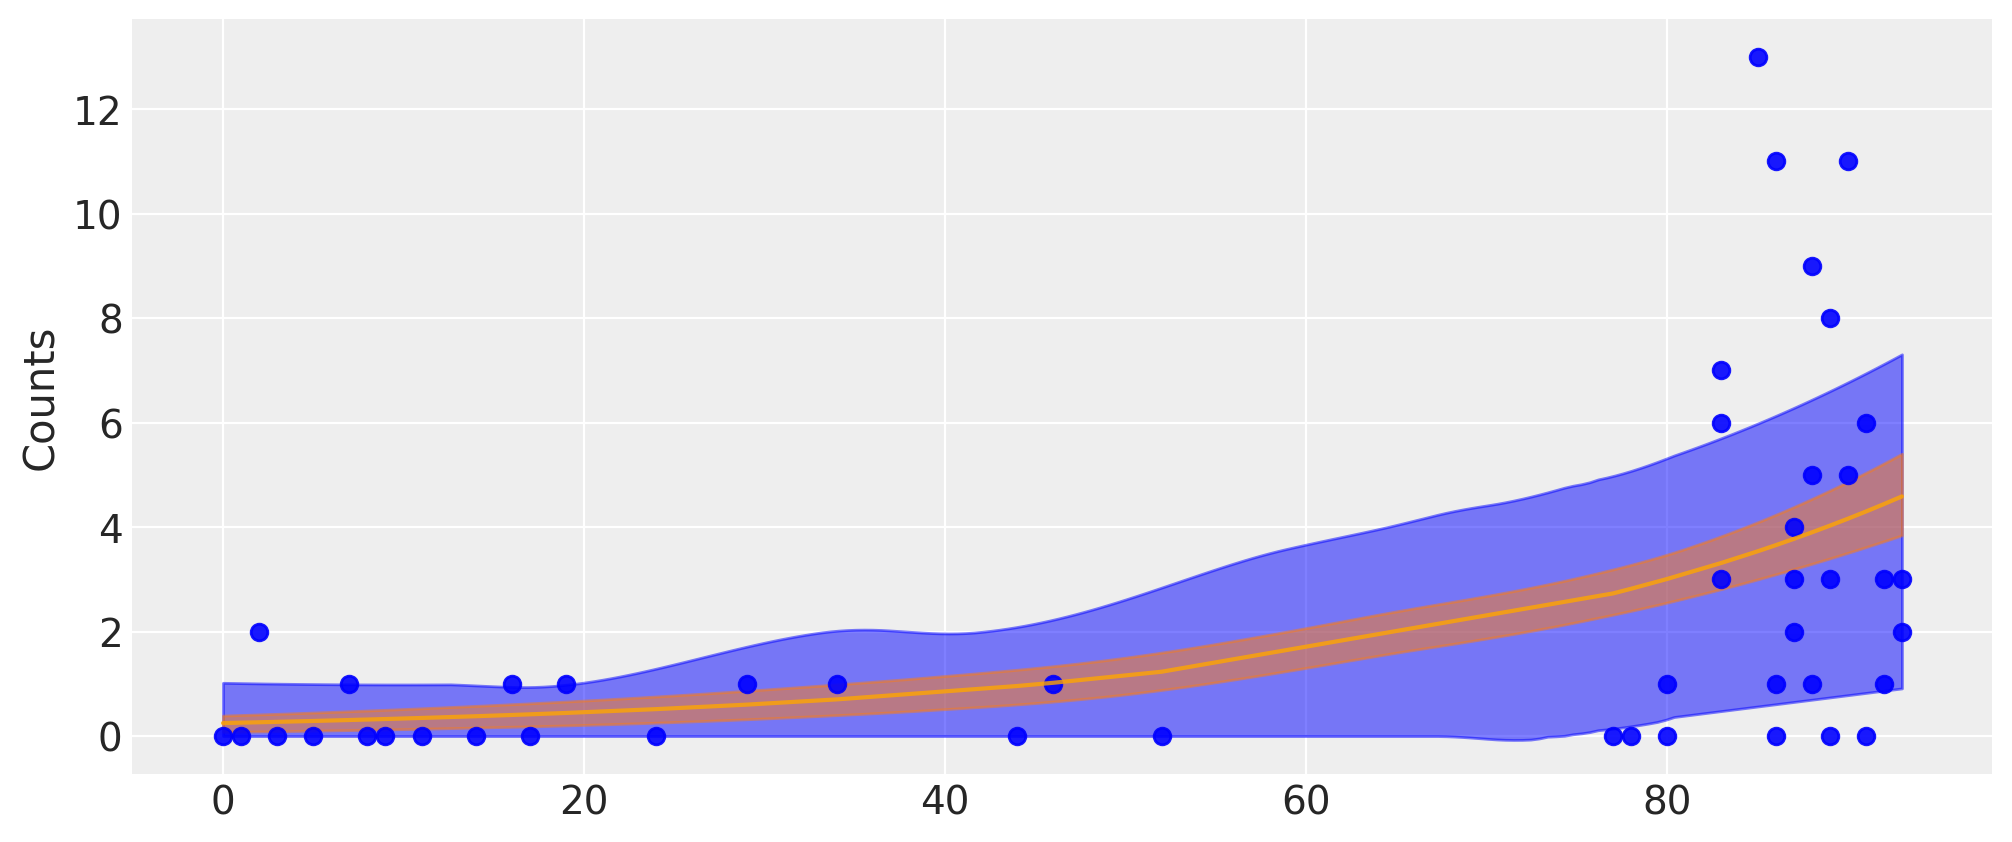

In [471]:
# Expected value = posterior mean of lambda, expected counts is mean of posterior predictions
expected_value = trace_h4.mean(0)

plt.figure(figsize=(12,5))
az.plot_hpd(sal.PCTCOVER, post_pred_c_df, credible_interval=0.89, color = 'blue')
az.plot_hpd(sal.PCTCOVER, trace_h4, credible_interval=0.89)
plt.plot(lambda_df.PCTCOVER, lambda_df.lamb, color='orange', alpha=0.8)
plt.scatter(sal.PCTCOVER, sal.SALAMAN, color = 'blue', alpha = 0.9)
plt.ylabel("Counts");

### 10H4b

In [472]:
with pm.Model() as h4_2:
    a = pm.Normal('a', 0, 1)
    bp = pm.Normal('bp', 0, 1)
    bf = pm.Normal('bf', 0, 1)
    
    lam = pm.math.exp(a + bp * sal.PCTCOVER_z + bf * sal.FORESTAGE_z)
    lamb = pm.Deterministic('lamb', lam)
    obs = pm.Poisson('SALAMAN', lam, observed=sal.SALAMAN)
    trace_h4_2 = pm.sample(2000, tune=2000, cores = 2)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [bf, bp, a]
Sampling 2 chains: 100%|██████████| 8000/8000 [00:03<00:00, 2067.69draws/s]
The acceptance probability does not match the target. It is 0.6686874120135117, but should be close to 0.8. Try to increase the number of tuning steps.


In [475]:
az.summary(trace_h4_2, ['~lamb'])

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
a,0.424,0.147,0.143,0.702,0.003,0.002,1983.0,1983.0,2019.0,2323.0,1.0
bp,1.143,0.189,0.803,1.514,0.004,0.003,1830.0,1825.0,1855.0,2109.0,1.0
bf,0.002,0.095,-0.169,0.188,0.002,0.001,2616.0,2025.0,2616.0,2498.0,1.0


Small positive correlation for bf with relatively wide hpd and large sd. Suggest after controlling for coverage that age of forest does not matter as much. 

In [476]:
with pm.Model() as h4_3:
    a = pm.Normal('a', 0, 1)
    bf = pm.Normal('bf', 0, 1)
    
    lam = pm.math.exp(a + bf * sal.FORESTAGE_z)
    lamb = pm.Deterministic('lamb', lam)
    obs = pm.Poisson('SALAMAN', lam, observed=sal.SALAMAN)
    trace_h4_3 = pm.sample(2000, tune=2000, cores = 2)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [bf, a]
Sampling 2 chains: 100%|██████████| 8000/8000 [00:02<00:00, 3078.86draws/s]


In [478]:
az.summary(trace_h4_3, ['~lamb'])

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
a,0.813,0.099,0.626,0.999,0.002,0.001,3225.0,3225.0,3243.0,2653.0,1.0
bf,0.369,0.080,0.216,0.514,0.001,0.001,3208.0,3173.0,3207.0,2630.0,1.0


In [480]:
sal.FORESTAGE_z.corr(sal.PCTCOVER_z)

0.625460015282306

Coefficient larger and sd smaller when using just forrestage. Strong correlation between forestage and percentage cover, so most of the individual variation of the univariate forestage model comes from its correlation with cover.